In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Okt
# KoNLPy의 형태소 분석기 Okt를 사용
okt = Okt()

- 불용어 지정 후 제거 : 면접 질문 데이터 분석에 필요하지 않은 단어들을 제거합니다.

In [ ]:
#불용어 리스트
stop_words = ['말씀','원자','생각','무엇','본인','이유','설명','시기','대해','가장','만약', '가요', '가지','신지','주로','혹시','한번','수도','우리','이야기',
              '저희','서도','경우','또한','모습','이전','부분','각각','인생','지금','지원','주시','다른','그것','위해','건가','구체','면접','회사','경험','업무','직무','방법','공부']

##워드클라우드 시각화


워드클라우드 시각화를 위해 한글 폰트를 설치합니다.


In [ ]:
# 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 121941 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
df_ard = pd.read_csv('/content/drive/MyDrive/2024/final_project/data/job_ARD.csv')
df_bm = pd.read_csv('/content/drive/MyDrive/2024/final_project/data/job_BM.csv')
df_ict = pd.read_csv('/content/drive/MyDrive/2024/final_project/data/job_ICT.csv')
df_mm = pd.read_csv('/content/drive/MyDrive/2024/final_project/data/job_MM.csv')
df_ps = pd.read_csv('/content/drive/MyDrive/2024/final_project/data/job_PS.csv')
df_rnd = pd.read_csv('/content/drive/MyDrive/2024/final_project/data/job_RND.csv')
df_sm = pd.read_csv('/content/drive/MyDrive/2024/final_project/data/job_SM.csv')
df_mm.head()

,dataSet.info.gender,dataSet.info.experience,dataSet.question.raw.text,dataSet.answer.raw.text,dataSet.answer.summary.text,age
0,FEMALE,EXPERIENCED,규칙적 업무 수행을 잘 하기 위해 만들어낸 지원자님만의 특별한 노하우나 방법이 있다...,규칙적으로 업무 수행을 잘 하려면은 그 업무의 경중을 따져서 업무가 어때 언제까지 ...,규칙적으로 업무 수행을 잘 하기 위해서는 업무의 경중을 따져서 업무가 언제까지 이루...,54
1,FEMALE,EXPERIENCED,만약 상사가 업무와 무관한 일을 시킨다면 잘 수행할 자신이 있나요 아니면 수행하지 ...,상사가 업무와 무관한 일을 시키면 그 일에 일이 제가 일하고 있는 공간 안에서 팀 ...,상사가 업무와 무관한 일을 시키면 업무와는 무관하더라도 팀 전체를 위해서 필요한 것...,54
2,FEMALE,EXPERIENCED,본인 스스로 생각할 때 본인은 창의에 가깝다고 생각을 하시는지 아니면 숫자에 가까운...,어 저는 숫자와 창의 주 둘 다 저는 어 중간쯤에 위치해 있다고 스스로 생각합니다....,숫자와 창의 주 둘 다 저는 중간쯤에 위치해 있다고 스스로 생각합니다. 그 이유는 ...,54
3,FEMALE,EXPERIENCED,어 태어나서 지금까지 여러 가지 일들을 후회하고 계실 텐데요 그중에 가장 후회하는 ...,태어나서 지금까지 한 일들 중 후회하는 일들이 뭐 아주 많지는 않습니다. 별로 생각...,"공부는 인생에서 아주 중요하고, 본인의 진로를 결정하는 중요한 시기에 할 수 있는 ...",54
4,FEMALE,EXPERIENCED,어 지금까지 협업을 하면서 어 어려웠던 점이 있으실 수 있었는데요 어 그 어려움들을...,협업하면서 가장 어려웠던 것은 서로 부서끼리 일을 해 나가고 함께 팀 안에서 일을 ...,협업하면서 가장 어려웠던 것은 부서끼리 일을 해 나갈 때 서로 일을 분류 분업 분업...,54


In [ ]:
df_mm.head()

,dataSet.info.gender,dataSet.info.experience,dataSet.question.raw.text,dataSet.answer.raw.text,dataSet.answer.summary.text,age
0,FEMALE,EXPERIENCED,규칙적 업무 수행을 잘 하기 위해 만들어낸 지원자님만의 특별한 노하우나 방법이 있다...,규칙적으로 업무 수행을 잘 하려면은 그 업무의 경중을 따져서 업무가 어때 언제까지 ...,규칙적으로 업무 수행을 잘 하기 위해서는 업무의 경중을 따져서 업무가 언제까지 이루...,54
1,FEMALE,EXPERIENCED,만약 상사가 업무와 무관한 일을 시킨다면 잘 수행할 자신이 있나요 아니면 수행하지 ...,상사가 업무와 무관한 일을 시키면 그 일에 일이 제가 일하고 있는 공간 안에서 팀 ...,상사가 업무와 무관한 일을 시키면 업무와는 무관하더라도 팀 전체를 위해서 필요한 것...,54
2,FEMALE,EXPERIENCED,본인 스스로 생각할 때 본인은 창의에 가깝다고 생각을 하시는지 아니면 숫자에 가까운...,어 저는 숫자와 창의 주 둘 다 저는 어 중간쯤에 위치해 있다고 스스로 생각합니다....,숫자와 창의 주 둘 다 저는 중간쯤에 위치해 있다고 스스로 생각합니다. 그 이유는 ...,54
3,FEMALE,EXPERIENCED,어 태어나서 지금까지 여러 가지 일들을 후회하고 계실 텐데요 그중에 가장 후회하는 ...,태어나서 지금까지 한 일들 중 후회하는 일들이 뭐 아주 많지는 않습니다. 별로 생각...,"공부는 인생에서 아주 중요하고, 본인의 진로를 결정하는 중요한 시기에 할 수 있는 ...",54
4,FEMALE,EXPERIENCED,어 지금까지 협업을 하면서 어 어려웠던 점이 있으실 수 있었는데요 어 그 어려움들을...,협업하면서 가장 어려웠던 것은 서로 부서끼리 일을 해 나가고 함께 팀 안에서 일을 ...,협업하면서 가장 어려웠던 것은 부서끼리 일을 해 나갈 때 서로 일을 분류 분업 분업...,54


##ARD 직군 워드클라우드

In [ ]:
# 문서 데이터셋
texts_ard = df_ard['dataSet.question.raw.text'].tolist()

# 형태소 분석을 통해 명사만 추출하고, 한글자 명사는 제외
processed_docs_ard = []
for text in texts_ard:
    nouns = okt.nouns(text)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1]  # 한글자 명사 제거
    processed_docs_ard.append(filtered_nouns)

In [ ]:
all_words_ard = sum(processed_docs_ard, [])

In [ ]:
filtered_words_ard = [word for word in all_words_ard if word not in stop_words]
word_freq_ard = {}
for word in filtered_words_ard:
    if word in word_freq_ard:
        word_freq_ard[word] += 1
    else:
        word_freq_ard[word] = 1

print(*sorted(word_freq_ard.items(), key=lambda x: x[1], reverse=True)[:40])

('디자인', 1751) ('해결', 842) ('수행', 657) ('스트레스', 626) ('노력', 626) ('최근', 541) ('시간', 531) ('해소', 520) ('상황', 500) ('자신', 490) ('사람', 478) ('분야', 472) ('입사', 464) ('협업', 464) ('직장', 443) ('검색', 422) ('트렌드', 421) ('평소', 408) ('프로젝트', 400) ('문제', 391) ('디자이너', 385) ('근무', 375) ('목표', 373) ('대처', 373) ('상사', 369) ('관리', 363) ('답변', 360) ('기억', 338) ('작업', 309) ('브랜드', 309) ('극복', 308) ('존경', 298) ('부서', 293) ('동료', 286) ('여러', 283) ('역할', 278) ('전공', 275) ('직접', 274) ('갈등', 254) ('현재', 251)


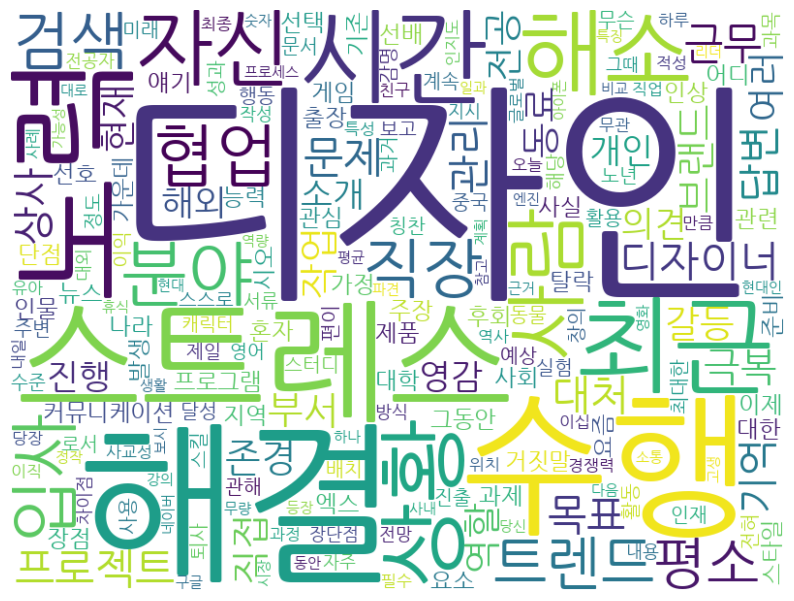

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 불용어 제거
filtered_words_ard = [word for word in all_words_ard if word not in stop_words]

# WordCloud 생성
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color="white", width=800, height=600)
wc.generate_from_frequencies(word_freq_ard)
# WordCloud 출력
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

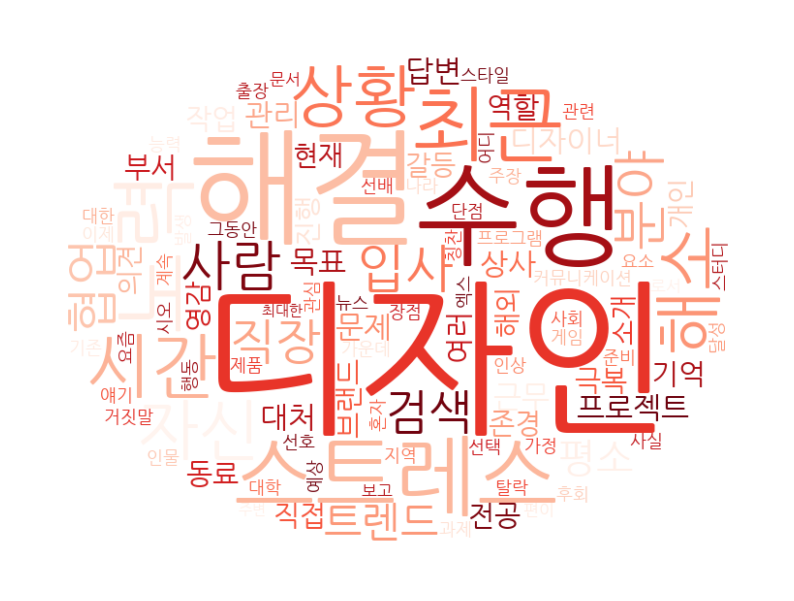

In [ ]:
mask = np.array(Image.open('/content/drive/MyDrive/2024/final_project/data/won.png'))
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color="white", width=800, height=600, max_words=100, colormap ='Reds',mask=mask)
wc.generate_from_frequencies(word_freq_ard)

# WordCloud 출력
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('/content/drive/MyDrive/2024/final_project/data/wordcloud_all.png', format='png', transparent=True)  # PNG로 저장
plt.show()



## BM 직군 워드클라우드


In [ ]:
# 문서 데이터셋
texts_bm = df_bm['dataSet.question.raw.text'].tolist()

# 형태소 분석을 통해 명사만 추출하고, 한글자 명사는 제외
processed_docs_bm = []
for text in texts_bm:
    nouns = okt.nouns(text)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1]  # 한글자 명사 제거
    processed_docs_bm.append(filtered_nouns)


In [ ]:
all_words_bm= sum(processed_docs_bm, [])

In [ ]:
filtered_words_bm = [word for word in all_words_bm if word not in stop_words]
word_freq_bm = {}
for word in filtered_words_bm:
    if word in word_freq_bm:
        word_freq_bm[word] += 1
    else:
        word_freq_bm[word] = 1

print(*sorted(word_freq_bm.items(), key=lambda x: x[1], reverse=True)[:40])

('입사', 39) ('해결', 34) ('자신', 32) ('수행', 29) ('노력', 28) ('직장', 27) ('스트레스', 26) ('출장', 25) ('해외', 25) ('프로젝트', 25) ('분야', 23) ('나라', 23) ('답변', 23) ('전공', 23) ('해소', 23) ('부서', 23) ('여러', 23) ('검색', 23) ('관리', 22) ('사람', 22) ('최근', 22) ('상황', 22) ('문제', 22) ('기억', 22) ('근무', 21) ('관련', 21) ('상사', 21) ('준비', 21) ('갈등', 20) ('평소', 19) ('작업', 19) ('중국', 18) ('직접', 18) ('개인', 18) ('대한', 18) ('시간', 17) ('문서', 17) ('의견', 17) ('선배', 16) ('그동안', 15)


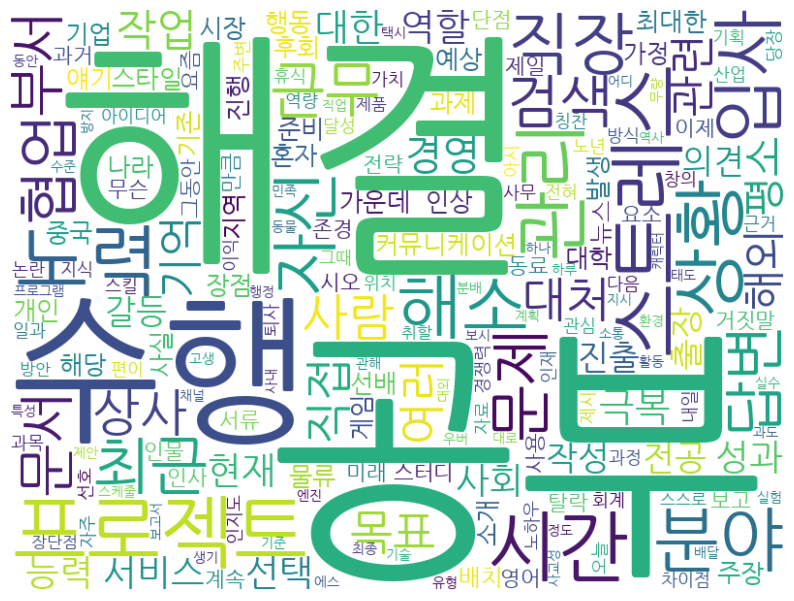

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 불용어 제거
filtered_words_ard = [word for word in all_words_ard if word not in stop_words]

# WordCloud 생성
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color="white", width=800, height=600)
wc.generate_from_frequencies(word_freq_bm)
# WordCloud 출력
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## ARD 직군 워드클라우드


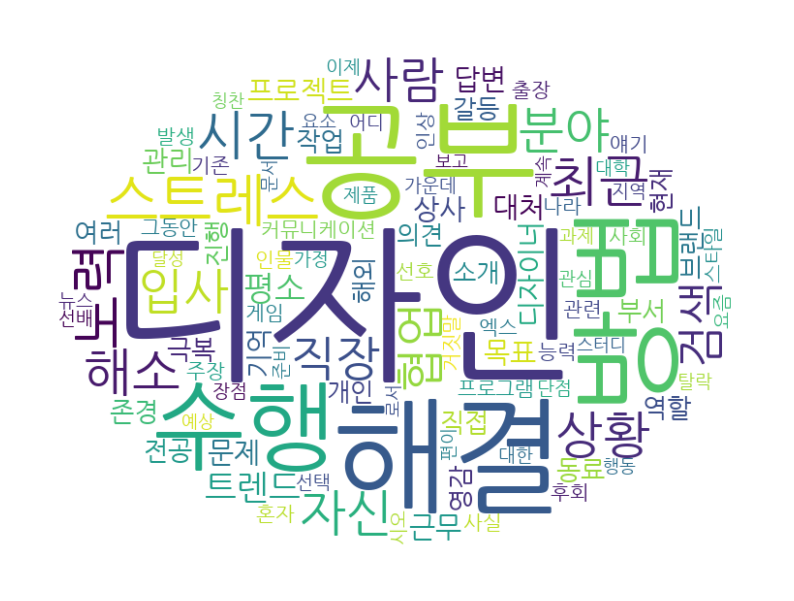

In [ ]:
mask = np.array(Image.open('/content/drive/MyDrive/2024/final_project/data/won.png'))
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color="white", width=800, height=600, max_words=100, mask=mask)
wc.generate_from_frequencies(word_freq_ard)

# WordCloud 출력
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('/content/drive/MyDrive/2024/final_project/data/wordcloud_all.png', format='png', transparent=True)  # PNG로 저장
plt.show()


In [ ]:
print(*sorted(word_freq_ict.items(), key=lambda x: x[1], reverse=True)[:40])

('회사', 1219) ('업무', 1055) ('해결', 878) ('공부', 871) ('경험', 811) ('방법', 701) ('직무', 677) ('자신', 593) ('노력', 575) ('수행', 544) ('분야', 542) ('스트레스', 535) ('문제', 530) ('시간', 520) ('입사', 475) ('해소', 464) ('상황', 456) ('직장', 435) ('사람', 414) ('근무', 407) ('개발', 401) ('대처', 400) ('상사', 382) ('검색', 377) ('협업', 375) ('프로젝트', 369) ('목표', 362) ('관리', 353) ('최근', 343) ('능력', 309) ('부서', 304) ('시오', 302) ('답변', 296) ('평소', 290) ('관련', 286) ('얘기', 281) ('극복', 277) ('여러', 276) ('직접', 275) ('프로그래밍', 272)


##BM 직군 워드클라우드


In [ ]:
# prompt: wordcloud 컬러맵 색 종류알려줘

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color="white", colormap="Reds", max_font_size=50, max_words=100)


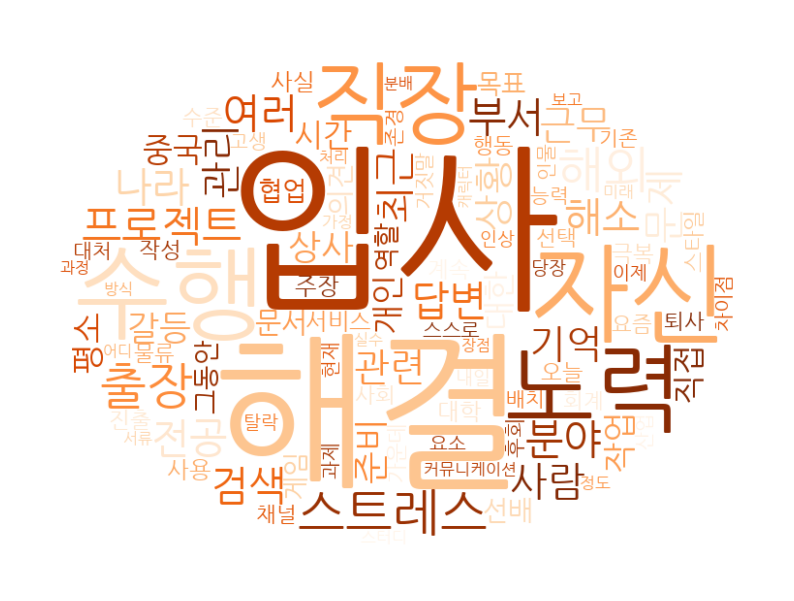

In [ ]:
# 불용어 제거
filtered_words_bm = [word for word in all_words_bm if word not in stop_words]

# 마스크 이미지 로드
mask = np.array(Image.open('/content/drive/MyDrive/2024/final_project/data/won.png'))

# WordCloud 객체 생성
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
               background_color="white",
               width=800,
               height=600,
               max_words=100,
               mask=mask,
               colormap ='Oranges')

# WordCloud 생성
wc.generate_from_frequencies(word_freq_bm)

# WordCloud 출력 및 저장
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('/content/drive/MyDrive/2024/final_project/data/wordcloud_all.png', format='png', transparent=True)
plt.show()


##ICT 직군 워드클라우드


In [ ]:
# 문서 데이터셋
texts_ict = df_ict['dataSet.question.raw.text'].tolist()

# 형태소 분석을 통해 명사만 추출하고, 한글자 명사는 제외
processed_docs_ict = []
for text in texts_ict:
    nouns = okt.nouns(text)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1]  # 한글자 명사 제거
    processed_docs_ict.append(filtered_nouns)

In [ ]:
all_words_ict= sum(processed_docs_ict, [])

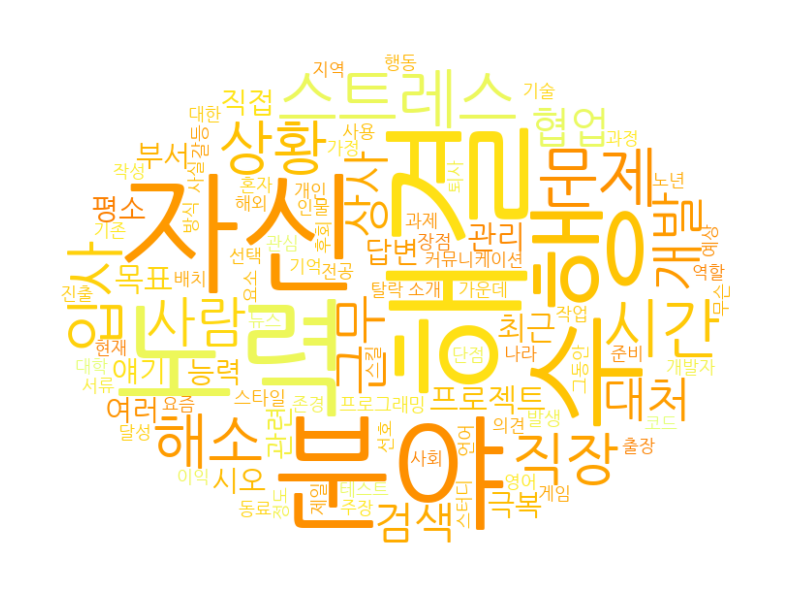

In [ ]:

#불용어 제거
filtered_words_ict = [word for word in all_words_ict if word not in stop_words]
#count
word_freq_ict = {}
for word in filtered_words_ict:
    if word in word_freq_ict:
        word_freq_ict[word] += 1
    else:
        word_freq_ict[word] = 1

# 마스크 이미지 로드
mask = np.array(Image.open('/content/drive/MyDrive/2024/final_project/data/won.png'))

# WordCloud 객체 생성
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
               background_color="white",
               width=800,
               height=600,
               max_words=100,
               mask=mask,
               colormap='Wistia_r')


# WordCloud 생성
wc.generate_from_frequencies(word_freq_ict)

# WordCloud 출력 및 저장
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('/content/drive/MyDrive/2024/final_project/data/wordcloud_all.png', format='png', transparent=True)
plt.show()


In [ ]:
# 문서 데이터셋
texts_mm = df_mm['dataSet.question.raw.text'].tolist()

# 형태소 분석을 통해 명사만 추출하고, 한글자 명사는 제외
processed_docs_mm = []
for text in texts_mm:
    nouns = okt.nouns(text)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1]  # 한글자 명사 제거
    processed_docs_mm.append(filtered_nouns)

In [ ]:
all_words_mm= sum(processed_docs_mm, [])

In [ ]:
#불용어 제거
filtered_words_mm = [word for word in all_words_mm if word not in stop_words]
#count
word_freq_mm = {}
for word in filtered_words_mm:
    if word in word_freq_mm:
        word_freq_mm[word] += 1
    else:
        word_freq_mm[word] = 1


#MM 직군 워드클라우드


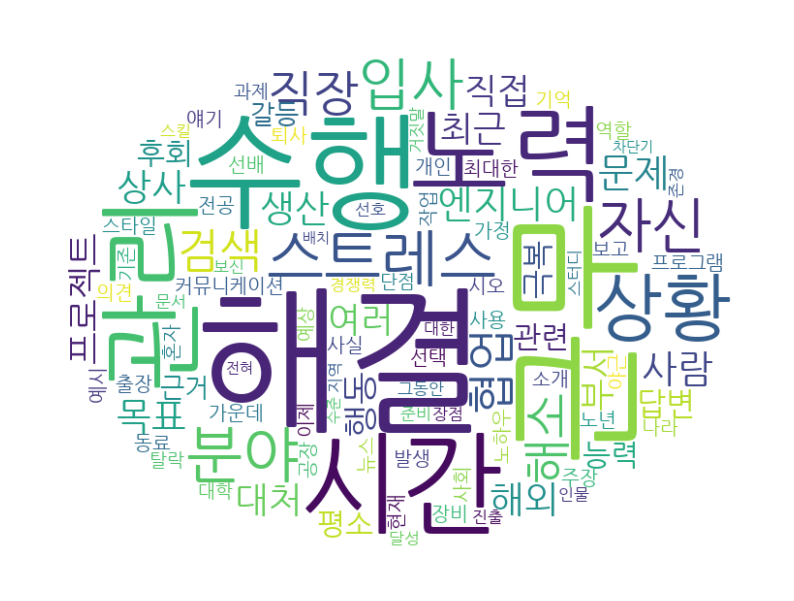

In [ ]:
# 마스크 이미지 로드
mask = np.array(Image.open('/content/drive/MyDrive/2024/final_project/data/won.png'))

# WordCloud 객체 생성
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
               background_color="white",
               width=800,
               height=600,
               max_words=100,
               mask=mask)
# WordCloud 생성
wc.generate_from_frequencies(word_freq_mm)

# WordCloud 출력 및 저장
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('/content/drive/MyDrive/2024/final_project/data/wordcloud_all.png', format='png', transparent=True)
plt.show()


In [ ]:
print(word_freq_mm)

{'규칙': 110, '수행': 677, '노하우': 215, '방법': 865, '예시': 199, '상사': 385, '무관': 83, '자신': 556, '인지도': 111, '스스로': 134, '창의': 130, '숫자': 91, '사람': 406, '여러': 321, '후회': 289, '협업': 445, '어려움': 76, '해결': 1062, '대처': 359, '커뮤니케이션': 266, '스킬': 169, '소개': 225, '직접': 331, '개인': 246, '학습': 39, '강의': 100, '활용': 152, '공부': 1017, '주요': 74, '성장': 85, '계획': 101, '목표': 392, '직장': 476, '퇴사': 212, '최종': 102, '탈락': 196, '상위': 81, '퍼센트': 80, '능력': 302, '최대한': 238, '설계': 99, '프로그램': 255, '생산': 381, '관리': 614, '부서': 315, '입사': 545, '근무': 836, '정작': 81, '분야': 586, '사실': 200, '지식': 82, '역량': 91, '태도': 81, '요소': 146, '대한': 179, '귀하': 42, '수준': 157, '사용': 229, '이름': 4, '최근': 328, '뉴스': 257, '가운데': 265, '인상': 157, '대학': 197, '전공': 240, '과목': 96, '기억': 242, '하나': 126, '선택': 229, '이직': 106, '동료': 265, '고령화': 75, '사회': 247, '가면': 57, '이제': 192, '치매': 67, '관련': 294, '문제': 404, '발생': 249, '건강': 18, '보험': 18, '공단': 72, '개선': 80, '방안': 75, '내용': 105, '강도': 96, '예상': 192, '전혀': 159, '상황': 601, '노년': 209, '이상': 120, '차질': 68

In [ ]:
# 문서 데이터셋
texts_ps = df_ps['dataSet.question.raw.text'].tolist()

# 형태소 분석을 통해 명사만 추출하고, 한글자 명사는 제외
processed_docs_ps = []
for text in texts_ps:
    nouns = okt.nouns(text)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1]  # 한글자 명사 제거
    processed_docs_ps.append(filtered_nouns)

##PS 직군 워드클라우드

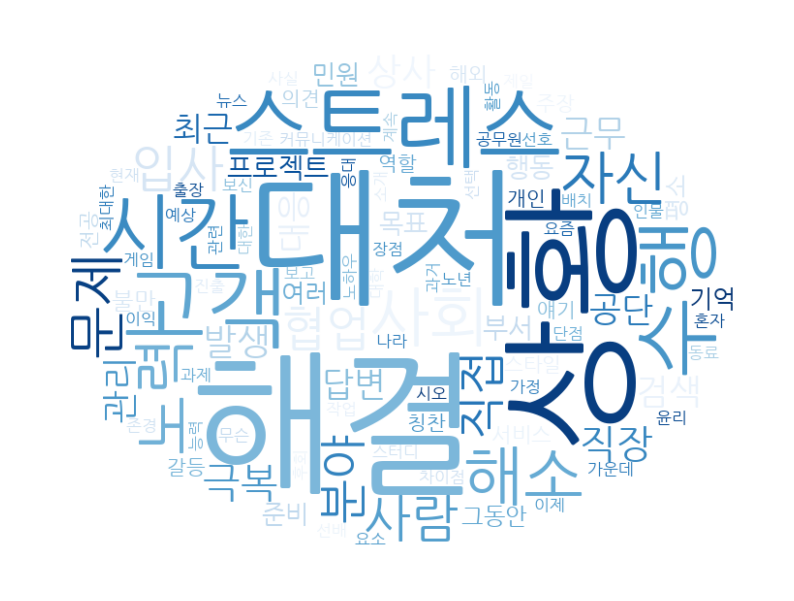

In [ ]:
all_words_ps= sum(processed_docs_ps, [])
#불용어 제거
filtered_words_ps = [word for word in all_words_ps if word not in stop_words]
#count
word_freq_ps = {}
for word in filtered_words_ps:
    if word in word_freq_ps:
        word_freq_ps[word] += 1
    else:
        word_freq_ps[word] = 1

# 마스크 이미지 로드
mask = np.array(Image.open('/content/drive/MyDrive/2024/final_project/data/won.png'))

# WordCloud 객체 생성
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
               background_color="white",
               width=800,
               height=600,
               max_words=100,
               mask=mask,
               colormap="Blues")

# WordCloud 생성
wc.generate_from_frequencies(word_freq_ps)

# WordCloud 출력 및 저장
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('/content/drive/MyDrive/2024/final_project/data/wordcloud_all.png', format='png', transparent=True)
plt.show()


##RND 직군 워드클라우드

In [ ]:
# 문서 데이터셋
texts_rnd = df_rnd['dataSet.question.raw.text'].tolist()

# 형태소 분석을 통해 명사만 추출하고, 한글자 명사는 제외
processed_docs_rnd = []
for text in texts_rnd:
    nouns = okt.nouns(text)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1]  # 한글자 명사 제거
    processed_docs_rnd.append(filtered_nouns)

In [ ]:
all_words_rnd= sum(processed_docs_rnd, [])

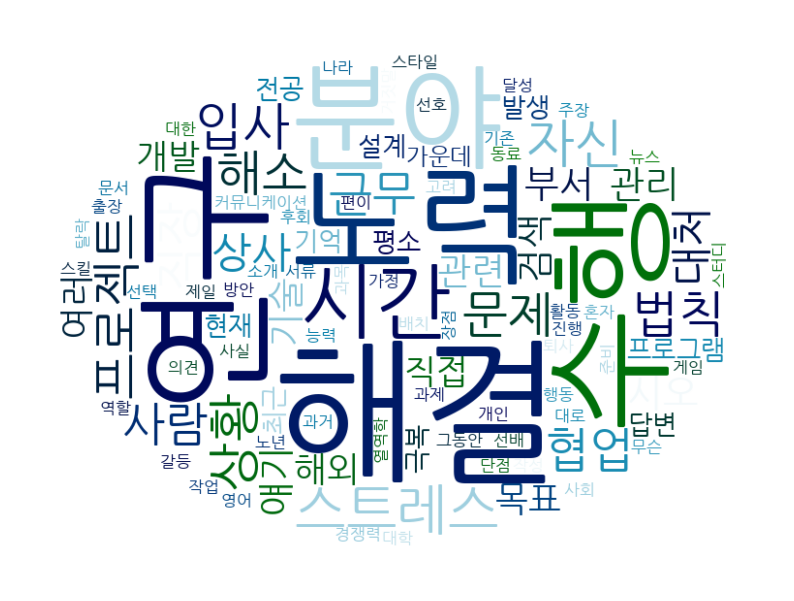

In [ ]:
#불용어 제거
filtered_words_rnd = [word for word in all_words_rnd if word not in stop_words]
#count
word_freq_rnd = {}
for word in filtered_words_rnd:
    if word in word_freq_rnd:
        word_freq_rnd[word] += 1
    else:
        word_freq_rnd[word] = 1

# 마스크 이미지 로드
mask = np.array(Image.open('/content/drive/MyDrive/2024/final_project/data/won.png'))

# WordCloud 객체 생성
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
               background_color="white",
               width=800,
               height=600,
               max_words=100,
               mask=mask,
               colormap="ocean")

# WordCloud 생성
wc.generate_from_frequencies(word_freq_rnd)

# WordCloud 출력 및 저장
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('/content/drive/MyDrive/2024/final_project/data/wordcloud_all.png', format='png', transparent=True)
plt.show()


#SM


In [ ]:
# 문서 데이터셋
texts_sm = df_sm['dataSet.question.raw.text'].tolist()

# 형태소 분석을 통해 명사만 추출하고, 한글자 명사는 제외
processed_docs_sm = []
for text in texts_sm:
    nouns = okt.nouns(text)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1]  # 한글자 명사 제거
    processed_docs_sm.append(filtered_nouns)



In [ ]:
all_words_sm= sum(processed_docs_sm, [])

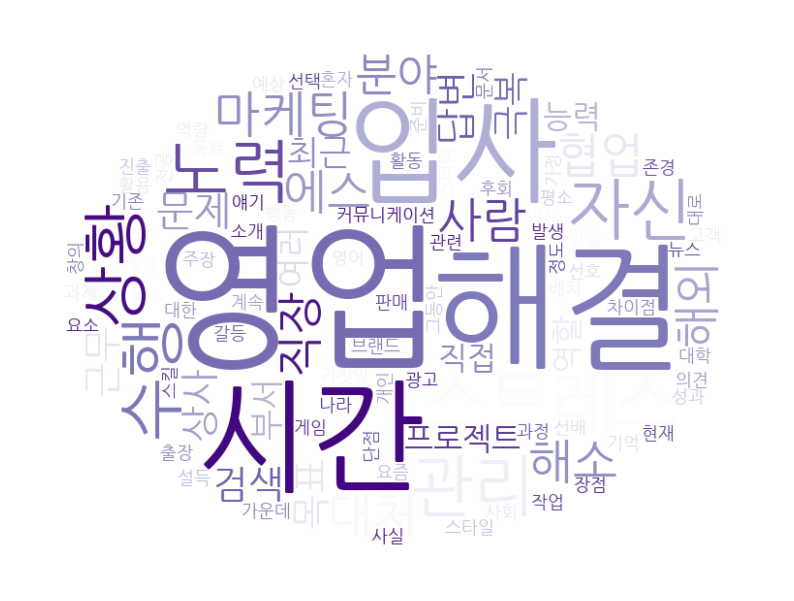

In [ ]:


#불용어 제거
filtered_words_sm = [word for word in all_words_sm if word not in stop_words]
#count
word_freq_sm = {}
for word in filtered_words_sm:
    if word in word_freq_sm:
        word_freq_sm[word] += 1
    else:
        word_freq_sm[word] = 1

# 마스크 이미지 로드
mask = np.array(Image.open('/content/drive/MyDrive/2024/final_project/data/won.png'))

# WordCloud 객체 생성
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
               background_color="white",
               width=800,
               height=600,
               max_words=100,
               mask=mask,
               colormap="Purples")

# WordCloud 생성
wc.generate_from_frequencies(word_freq_sm)

# WordCloud 출력 및 저장
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('/content/drive/MyDrive/2024/final_project/data/wordcloud_all.png', format='png', transparent=True)
plt.show()
